# Show distribtion of fixed partition for each species


In [1]:
import numpy as np
from path import Path
import matplotlib.pyplot as plt
from glob import glob
from tqdm import tqdm
import os
import sys
sys.path.append('../')
import random
from tool.data_io import get_data_paths,read_image, read_json,save_json
import pandas as pd
import copy

In [2]:
root, id2paths = get_data_paths('../../configs/original_leaf.yml')
root  = Path(root)
partition = read_json('../../stats/partition_clean_tileW512H512M4.json')
labels = read_json('../../stats/label_file_common_binary.json')
sp2short={'quercus-lobata':'ql', 'quercus-bicolor-herbivory':'qb', 'onoclea-sensibilis-herbivory':'os'}
d2short={'__background__':'bg','hole':'ho','margin':'mar', 'skel':'sk'}

In [65]:
phase2spec={}
for phase, its in partition.items():
    if phase not in phase2spec.keys():
        phase2spec[phase]={}
    for it in its['images'].keys():
        sp,_=it.split('/')
        if sp not in phase2spec[phase].keys():
            phase2spec[phase][sp] = 0
        phase2spec[phase][sp]+=1

dis_sp = pd.DataFrame.from_dict(phase2spec)
dis_sp

,training,validation,testing
quercus-lobata,212,38,111
quercus-bicolor-herbivory,219,28,98
onoclea-sensibilis-herbivory,76,18,45


In [73]:
sp2dm={}
for phase, ps in partition.items():
    if phase not in sp2dm.keys():
        sp2dm[phase]={}    
    for id_,pth in tqdm(ps['images'].items()):
        sp,_=id_.split('/')
        sp_short=sp2short[sp]
        if sp_short not in sp2dm[phase].keys():
            sp2dm[phase][sp_short]={}
        label, _ = read_image(root/pth['label'])
        mask, _ = read_image(root/pth['leaf_mask'])
        label = label*mask.astype('float')
        for k,v in labels[sp].items():
            name_d=d2short[v['label']]
            if  name_d not in sp2dm[phase][sp_short].keys():
                sp2dm[phase][sp_short][name_d]=0
            sp2dm[phase][sp_short][name_d] += int((label==int(k)).sum())

100%|██████████| 254/254 [00:58<00:00,  4.37it/s]


In [76]:
sp2dm = read_json('sp2dm.json')

In [48]:
for sp, v in sp2dm.items():
    dis_sp_d = pd.DataFrame.from_dict(sp2dm[sp])

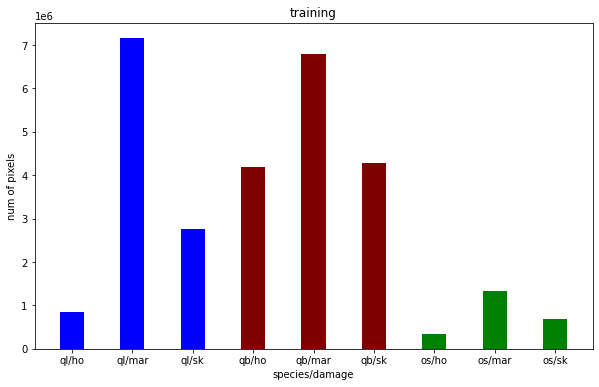

In [93]:
# pd.DataFrame.from_dict(sp2dm['training'])
def plt_damge_distribution(phase, sp2dm,figsize=(10,6)):
    list_x = []
    list_y= []
    for sp, it in sp2dm[phase].items():
        for k, v in it.items():
            if k == 'bg':
                continue
            list_x += [sp+'/'+k]
            list_y += [v]
    
    plt.figure(figsize=figsize)
    plt.title(phase)
    colors = ['b','maroon','g']   
    for i in range(3):
        plt.bar(list_x[i*3:i*3+3], list_y[i*3:i*3+3],color=colors[i], width = 0.4)
        plt.ylabel('num of pixels')
        plt.xlabel('species/damage')
plt_damge_distribution('training', sp2dm)

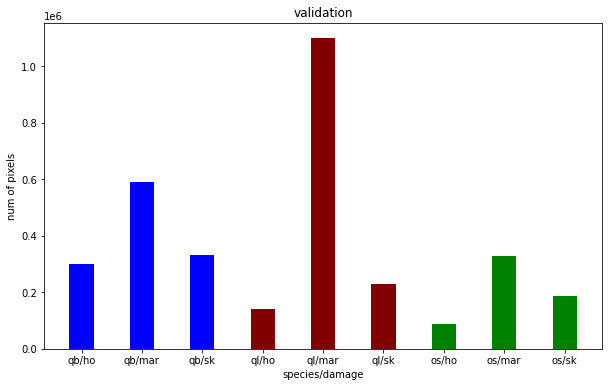

In [94]:
plt_damge_distribution('validation', sp2dm)

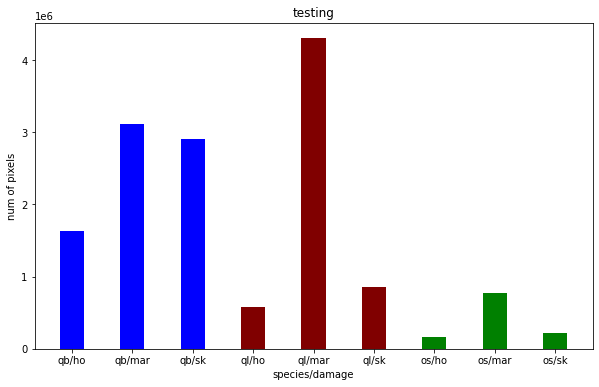

In [95]:
plt_damge_distribution('testing', sp2dm)

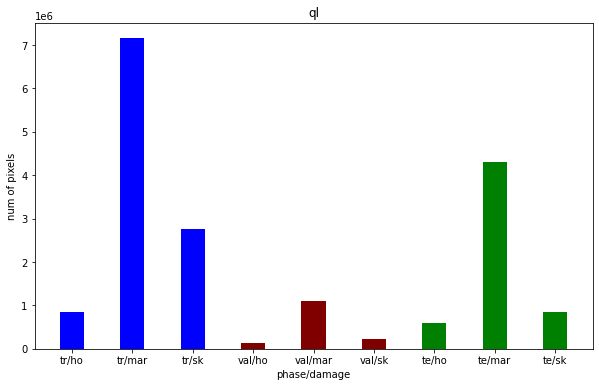

In [100]:
def plt_damge_distribution(species, sp2dm,figsize=(10,6)):
    phase2short={'training':'tr','validation':'val','testing':'te'}
    list_x = []
    list_y= []
    for phase in sp2dm.keys():
        for sp, it in sp2dm[phase].items():
            if sp != species:
                continue
            for k, v in it.items():
                if k == 'bg':
                    continue
                list_x += [phase2short[phase]+'/'+k]
                list_y += [v]

    plt.figure(figsize=figsize)
    plt.title(species)
    colors = ['b','maroon','g']   
    for i in range(3):
        plt.bar(list_x[i*3:i*3+3], list_y[i*3:i*3+3],color=colors[i], width = 0.4)
        plt.ylabel('num of pixels')
        plt.xlabel('phase/damage')
plt_damge_distribution('ql', sp2dm,figsize=(10,6))

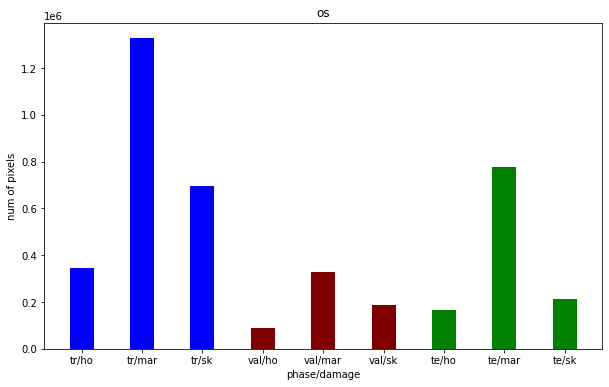

In [101]:
plt_damge_distribution('os', sp2dm,figsize=(10,6))

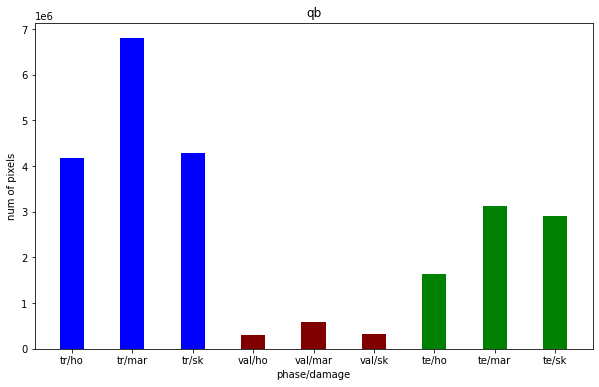

In [102]:
plt_damge_distribution('qb', sp2dm,figsize=(10,6))

# Single Label

In [126]:
labels

{'quercus-bicolor-herbivory': {'0': {'label': '__background__',
   'number': 0,
   'color': [0, 0, 0]},
  '1': {'label': '__background__', 'number': 0, 'color': [0, 0, 0]},
  '2': {'label': 'hole', 'number': 1, 'color': [255, 255, 255]},
  '3': {'label': 'margin', 'number': 1, 'color': [255, 255, 255]},
  '4': {'label': '__background__', 'number': 0, 'color': [0, 0, 0]},
  '5': {'label': 'skel', 'number': 1, 'color': [255, 255, 255]}},
 'onoclea-sensibilis-herbivory': {'0': {'label': '__background__',
   'number': 0,
   'color': [0, 0, 0]},
  '1': {'label': 'hole', 'number': 1, 'color': [255, 255, 255]},
  '2': {'label': 'margin', 'number': 1, 'color': [255, 255, 255]},
  '3': {'label': 'skel', 'number': 1, 'color': [255, 255, 255]}},
 'quercus-lobata': {'0': {'label': '__background__',
   'number': 0,
   'color': [0, 0, 0]},
  '1': {'label': '__background__', 'number': 0, 'color': [0, 0, 0]},
  '2': {'label': 'hole', 'number': 1, 'color': [255, 255, 255]},
  '3': {'label': 'margin', '

In [132]:
target_sp = ['']
file_name = 'label_margin.json'
path = Path('/home/users/xs75/Xian/leaf-damage-new/leaves/stats')
single_label = copy.deepcopy(labels)
for sp, it in labels.items():
    for k,v in labels[sp].items():
        if v['label'] not in target_sp:
            single_label[sp][k]['label']='__background__'
            single_label[sp][k]['number'] = 0
            single_label[sp][k]['color'] = [0,0,0]
save_json(path/file_name,single_label)

In [134]:
read_json(path/'label_hole_skel.json')

{'quercus-bicolor-herbivory': {'0': {'label': '__background__',
   'number': 0,
   'color': [0, 0, 0]},
  '1': {'label': '__background__', 'number': 0, 'color': [0, 0, 0]},
  '2': {'label': 'hole', 'number': 1, 'color': [255, 255, 255]},
  '3': {'label': '__background__', 'number': 0, 'color': [0, 0, 0]},
  '4': {'label': '__background__', 'number': 0, 'color': [0, 0, 0]},
  '5': {'label': 'skel', 'number': 1, 'color': [255, 255, 255]}},
 'onoclea-sensibilis-herbivory': {'0': {'label': '__background__',
   'number': 0,
   'color': [0, 0, 0]},
  '1': {'label': 'hole', 'number': 1, 'color': [255, 255, 255]},
  '2': {'label': '__background__', 'number': 0, 'color': [0, 0, 0]},
  '3': {'label': 'skel', 'number': 1, 'color': [255, 255, 255]}},
 'quercus-lobata': {'0': {'label': '__background__',
   'number': 0,
   'color': [0, 0, 0]},
  '1': {'label': '__background__', 'number': 0, 'color': [0, 0, 0]},
  '2': {'label': 'hole', 'number': 1, 'color': [255, 255, 255]},
  '3': {'label': '__back

# Single Species